In [1]:
"""
O-information
=============
"""
import numpy as np

from hoi.metrics import RSI, Oinfo
from hoi.utils import get_nbest_mult
from hoi.plot import plot_landscape
import xgi

import matplotlib.pyplot as plt
plt.style.use('ggplot')



/home/INT/neri.m/anaconda3/envs/matte_plot_env/lib/python3.12/site-packages/hoi-0.0.5-py3.12.egg/hoi/utils/logging.py:52: SyntaxWarning: invalid escape sequence '\*'
/home/INT/neri.m/anaconda3/envs/matte_plot_env/lib/python3.12/site-packages/hoi-0.0.5-py3.12.egg/hoi/utils/logging.py:52: SyntaxWarning: invalid escape sequence '\*'
/home/INT/neri.m/anaconda3/envs/matte_plot_env/lib/python3.12/site-packages/tqdm-4.67.1-py3.12.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/INT/neri.m/anaconda3/envs/matte_plot_env/lib/python3.12/site-packages/hoi-0.0.5-py3.12.egg/hoi/metrics/infotopo.py:47: SyntaxWarning: invalid escape sequence '\s'
/home/INT/neri.m/anaconda3/envs/matte_plot_env/lib/python3.12/site-packages/hoi-0.0.5-py3.12.egg/hoi/metrics/infotopo.py:47: SyntaxWarning: invalid escape sequence '\s'
/home/INT/neri.m/anaconda3

## Definition

The O-information is a multivariate measure of information capable of disentangling whether a subset of a variable `X` is dominated by redunancy or synergy. The O-information is defined as the difference between the Total Correlation and the Dual Total Correlation. As both quantities are respectively linked to redundancy and synergy, the O-information is going to be positive when a system is dominated by redundant interactions and negative when the system is dominated by synergistic interactions. The mathematical definition of the O-information is given by:

$$
\Omega(X^{n})  =  TC(X^{n}) - DTC(X^{n}) \\
               =  (n - 2)H(X^{n}) + \sum_{j=1}^{n} \left[ H(X_{j}) - H(X_{-j}^{n}) \right]
$$

---

## Simulate Univariate Redundancy

A very simple way to simulate redundancy between three variables, is to copy one of the three variables in the other two. This is what is done step-by-step in the following cell. 

For further information about how to simulate redundant and synergistic interactions, check out the example: [Simulating Redundant and Synergistic Interactions](https://example.com/sphx_glr_auto_examples_tutorials_plot_sim_red_syn.py).

In [2]:

# lets start by simulating a variable x with 200 samples and 7 features
x = np.random.rand(200, 7)

# we now send the variable x1 in the column (3, 5) of x
x[:, 3] += x[:, 1]
x[:, 5] += x[:, 1]

# define the Oinfo model and launch it
model = Oinfo(x)
hoi = model.fit(minsize=3, maxsize=5)

# now we can take a look at the multiplets with the highest and lowest values
# of Oinfo. We will only select the multiplets of size 3 here
df = get_nbest_mult(hoi, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0     20      3  0.193099  [1, 3, 5]
1     24      3  0.007586  [1, 5, 6]
2     21      3  0.003909  [1, 3, 6]
3      1      3 -0.002086  [0, 1, 3]
4     19      3 -0.003185  [1, 3, 4]
5     17      3 -0.003698  [1, 2, 5]


###############################################################################
# Simulate univariate and multivariate synergy
-------------------------------------------------------------------------------

As we have already seen in the other part of the tutorial, we observe synergy
between three variables, if one variable is equal to the sum of the other two. 


In [3]:
# simulate the variable x
x = np.random.rand(200, 7)

# synergy between (0, 3, 5) and 5
x[:, 0] = x[:, 3] + x[:, 5]

# define the RSI, launch it and inspect the best multiplets
model = Oinfo(x)
hoi = model.fit(minsize=3, maxsize=5)
df = get_nbest_mult(hoi, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0      3      3  0.010324  [0, 1, 5]
1      1      3  0.002766  [0, 1, 3]
2     27      3  0.001111  [2, 3, 6]
3      5      3 -0.007395  [0, 2, 3]
4      7      3 -0.023213  [0, 2, 5]
5     10      3 -1.561881  [0, 3, 5]


# Combining redundancy and synergy

In [4]:
# simulate the variable x and y
x = np.random.rand(200, 7)

# synergy between (0, 1, 2) and the first column of y
x[:, 0] = x[:, 1] + x[:, 2]

# redundancy between (3, 4, 5) and the second column of x
x[:, 4] += x[:, 3]
x[:, 5] += x[:, 3]

# define the RSI, launch it and inspect the best multiplets
model = Oinfo(x)
hoi = model.fit(minsize=3, maxsize=5)
df = get_nbest_mult(hoi, model=model, minsize=3, maxsize=3, n_best=3)
print(df)



    Copnorm and demean the data
Get list of multiplets
                                                           

   index  order       hoi  multiplet
0     31      3  0.201861  [3, 4, 5]
1     25      3  0.014796  [2, 3, 4]
2     26      3  0.006590  [2, 3, 5]
3      2      3 -0.003978  [0, 1, 4]
4      1      3 -0.007170  [0, 1, 3]
5      0      3 -1.387849  [0, 1, 2]


# Plot the result at each order to observe the spreading at orders higher than 3

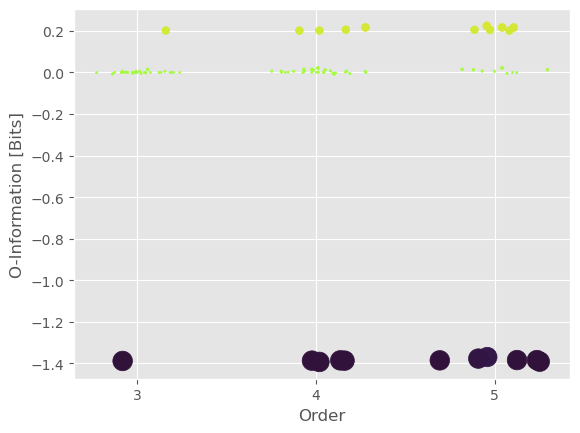

In [5]:
plot_landscape(
    hoi,
    model,
    kind="scatter",
    undersampling=False,
    plt_kwargs=dict(cmap="turbo"),
)
plt.show()

# Here, we use another toolbox, to plot the computed higher-order interactions

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x7f198f5764e0>,
  <matplotlib.collections.PatchCollection at 0x7f198f576630>))

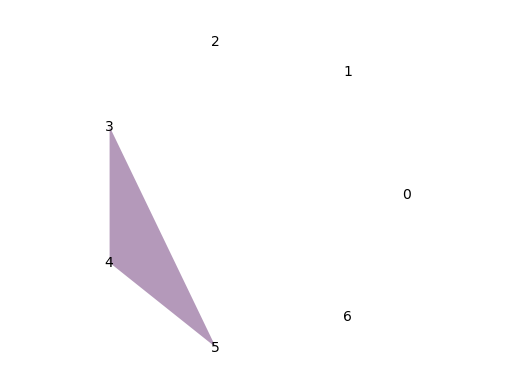

In [8]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0.1)[0]
index_neg=np.where(df['hoi']<-0.1)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_pos][::-1])

dict_node_labels={}
for i in range(len(hype.nodes)):
    dict_node_labels[i]=str(i)

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_pos][::-1], node_size=0, edge_fc_cmap='viridis')

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x7f19d046e240>,
  <matplotlib.collections.PatchCollection at 0x7f19d0176270>))

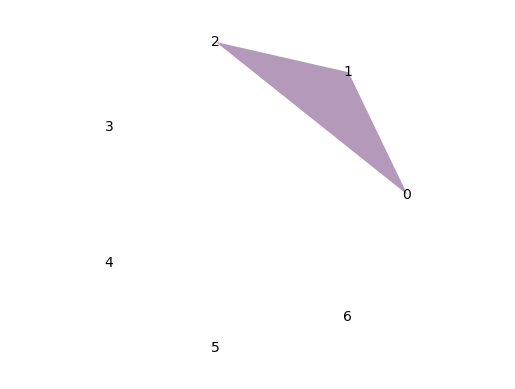

In [9]:
hype=xgi.Hypergraph()

#Here we separate the synergistic and redundant interactions
index_pos=np.where(df['hoi']>0.1)[0]
index_neg=np.where(df['hoi']<-0.1)[0]
hype.add_nodes_from(np.arange(0,7))
hype.add_edges_from(df['multiplet'][index_neg][::-1])

dict_node_labels={}
for i in range(len(hype.nodes)):
    dict_node_labels[i]=str(i)

xgi.draw(hype, pos=xgi.drawing.layout.circular_layout(hype), node_labels=dict_node_labels, edge_fc=df['hoi'][index_neg][::-1], node_size=0, edge_fc_cmap='viridis')